<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import plotly express
import plotly.express as px

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [45]:
#read csv file
movies = pd.read_csv('imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [46]:
# shape returns number of rows and column
#979 rows and 6 columns for movies df
movies.shape

(979, 6)

#### Check the data type of each column.

In [47]:
#info reutns data type of each column
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [48]:
# #It will output the mean/average of that duration column
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [49]:
# sort_values function to sort
# nlargest value to retrieve 1 largest value of duration column
# nshortest value to retrieve 1 smallest value of duration column
longest_movie = movies.sort_values(by='duration').nlargest(1, 'duration')
shortest_movie = movies.sort_values(by='duration').nsmallest(1, 'duration')
print("The longest movie")
print(longest_movie)
print("The shortest movie")
print(shortest_movie)

The longest movie
     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  
The shortest movie
     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [50]:
# using plotly histogram

fig = px.histogram(movies, x="duration", nbins=20)
fig.update_layout(
    title_text='histogram of duration', # title of plot
    xaxis_title_text='Duration', # xaxis label
    yaxis_title_text='Movie Title', # yaxis label
)
fig.show()


#### Use a box plot to display that same data.

In [51]:
## using plotly box 
fig = px.box(movies, x="duration")
fig.update_layout(
    title_text='duration of movies', # title of plot
    yaxis_title_text='Duration', # yaxis label
)
fig.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [52]:
# group by content rating and count
movies_groupby_rating = movies[['title','content_rating']].groupby('content_rating')['title'].count()
movies_groupby_rating

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, 'Total Titles')

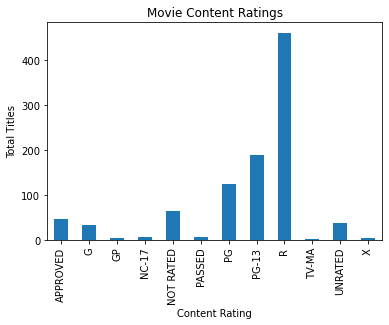

In [71]:
#used matplotlib
movies_groupby_rating.plot(kind ='bar', title='Movie Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Total Titles')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [69]:
#use replace method
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED')
#verify answer
movies['content_rating'].unique()


array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [70]:
#use replace method
movies['content_rating'] = movies['content_rating'].replace(['X','TV-MA'],'NC-17')
#verify answer
movies['content_rating'].unique()

array(['R', 'PG-13', 'UNRATED', 'PG', 'G', 'NC-17', nan], dtype=object)

#### Count the number of missing values in each column.

In [52]:
#isnull - Detect missing values
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [76]:
movies.fillna(value='reasonable')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [66]:
# Calculate mena/average of movies

#movies 2 hours or longer
query_longer = movies[movies['duration'] >= 120]['star_rating'].mean()

#movies shorter than 2 hours
query_shorter = movies[movies['duration'] < 120]['star_rating'].mean()

print(f"Average star rating for movies 2 hours or longer = {query_longer} ")
print(f"Average star rating for movies 2 hours or shorter = {query_shorter} ")


Average star rating for movies 2 hours or longer = 7.948898678414082 
Average star rating for movies 2 hours or shorter = 7.838666666666657 


#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [78]:
# using plotly scatter library
fig = px.scatter(movies, 
                 x = 'duration', # x-axis represent duration
                 y = 'star_rating', # y-axis represent star rating
                 labels = {'duration': 'Movie Duration', 'star_rating' : 'Star Rating'},
                 title = 'Relationship between duration and star rating',
                 color='star_rating', #beautify
                 trendline = 'ols'    # Trendline
                )
fig.show()

#### Calculate the average duration for each genre.

In [67]:
# groupby genre and calculate average duration
movies.groupby('genre')[['duration']].mean()

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

In [82]:
# using plotly scatter library
fig = px.violin(movies, 
                 x = 'duration', # x-axis represent duration
                 y = 'content_rating', # y-axis represent content rating
                 labels = {'duration': 'Movie Duration', 'content_rating' : 'Content Rating'},
                 title = 'Relationship between duration and content rating',
                 color='content_rating', #beautify
                )
fig.show()

#### Determine the top rated movie (by star rating) for each genre.

In [88]:
#groupby genre, calculate max star rating
movies.groupby('genre')[['star_rating']].max()

,star_rating
genre,
Action,9.0
Adventure,8.9
Animation,8.6
Biography,8.9
Comedy,8.6
Crime,9.3
Drama,8.9
Family,7.9
Fantasy,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [98]:
# movies[movies.duplicated(['title']) - get the duplicate titles
duplicate_titles = movies.duplicated(['title'])
# use isin to check if the title exists in the duplicate values
duplicate_title_available = movies['title'].isin(movies[duplicate_titles]['title'])
# sort the title, to verify answer
duplicate_movie_title_sorted = movies[duplicate_title_available].sort_values(by = "title")

duplicate_movie_title_sorted


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,reasonable,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [102]:

movies.groupby('genre').count()


,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,136,136,136,136,136
Adventure,75,75,75,75,75
Animation,62,62,62,62,62
Biography,77,77,77,77,77
Comedy,156,156,156,156,156
Crime,124,124,124,124,124
Drama,278,278,278,278,278
Family,2,2,2,2,2
Fantasy,1,1,1,1,1


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [103]:
#include genres with at least 10 movies
genres_with_at_least_10 = movies['genre'].value_counts() >= 10
genres_with_at_least_10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Thriller     False
Sci-Fi       False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [106]:
#created a list of relevant genres from atleast 10+ movies
relevant_genres = ['Action', 'Comedy', 'Family', 'Thriller']
relevant_genres

['Action', 'Comedy', 'Family', 'Thriller']

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [105]:
#get all movies in relevant genre, where movie count is 10+
all_movies_in_relevant_genres = movies[movies['genre'].isin(relevant_genres)]
# groupby genre and calculate average star rating
all_movies_in_relevant_genres.groupby('genre')['star_rating'].mean()

genre
Action      7.884559
Comedy      7.822436
Family      7.850000
Thriller    7.680000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [108]:
all_movies_in_relevant_genres.groupby('genre')['star_rating'].agg(['count', 'mean'])

,count,mean
genre,,
Action,136,7.884559
Comedy,156,7.822436
Family,2,7.850000
Thriller,5,7.680000


## Bonus

#### Figure out something "interesting" using the actors data!